In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_full_5sekres.xlsx')

In [3]:
df1 = df.copy()


# Firsly create a time series total load profile and generation

In [4]:
# Loads in the system are propulsion, battery charging and hotel load. 

# Add battery out to load and subtract battery in from production

# Maybe assume a hotel load for each Operation ID

#Create column of battery output and set negatives as zero
df1['Battery_Out'] = df1['battery_0__actualPower']
num = df1['Battery_Out']._get_numeric_data()
num[num < 0] = 0

#Create a colimn of load profile
df1['Load'] = df1['thrusterAndPropulsion']
df1.loc[df1['operationId'] == 100, 'BaseLoad'] = 500
df1.loc[df1['operationId'] == 3, 'BaseLoad'] = 550
df1.loc[df1['operationId'] == 5, 'BaseLoad'] = 510
df1.loc[df1['operationId'] == 6, 'BaseLoad'] = 250
df1.loc[df1['operationId'] == 1, 'BaseLoad'] = 250
df1.loc[df1['operationId'] == 7, 'BaseLoad'] = 380
df1['Load'] = df1['thrusterAndPropulsion'] + df1['BaseLoad']

In [5]:
display(df1)

,Unnamed: 0,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,...,engMdoPerformance_2_,engMdoPerformance_3_,engMdoConsumption_0_,engMdoConsumption_1_,engMdoConsumption_2_,engMdoConsumption_3_,speedOverGround,Battery_Out,Load,BaseLoad
0,0,2020-01-30 00:00:00,0.5,0.0,0.0,250.0,249.5,0.0,6.0,0.0,...,0,0.0000,0.0,0.00,0.0,0.00,0.077333,0.5,250.0,250.0
1,1,2020-01-30 00:00:05,-0.2,0.0,0.0,250.0,250.2,0.0,6.0,0.0,...,0,0.0000,0.0,0.00,0.0,0.00,0.090800,0.0,250.0,250.0
2,2,2020-01-30 00:00:10,0.2,0.0,0.0,250.0,249.8,0.0,6.0,0.0,...,0,0.0000,0.0,0.00,0.0,0.00,0.109600,0.2,250.0,250.0
3,3,2020-01-30 00:00:15,-1.0,0.0,0.0,250.0,251.0,0.0,6.0,0.0,...,0,0.0000,0.0,0.00,0.0,0.00,0.081200,0.0,250.0,250.0
4,4,2020-01-30 00:00:20,-0.4,0.0,0.0,250.0,250.4,0.0,6.0,0.0,...,0,0.0000,0.0,0.00,0.0,0.00,0.060600,0.0,250.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120955,120955,2020-02-05 23:59:35,0.8,1496.0,2143.8,648.6,0.0,2.0,3.0,0.0,...,0,214.9622,0.0,272.82,0.0,264.63,6.207200,0.8,2046.0,550.0
120956,120956,2020-02-05 23:59:40,1.2,1443.2,2008.0,566.0,0.0,2.0,3.0,0.0,...,0,224.8812,0.0,265.35,0.0,258.92,6.304200,1.2,1993.2,550.0
120957,120957,2020-02-05 23:59:45,-2.4,1425.6,2025.4,597.4,0.0,2.0,3.0,0.0,...,0,221.9196,0.0,263.73,0.0,260.06,6.865400,0.0,1975.6,550.0
120958,120958,2020-02-05 23:59:50,6.4,1460.8,2112.8,658.4,0.0,2.0,3.0,0.0,...,0,217.7654,0.0,269.05,0.0,263.73,6.988200,6.4,2010.8,550.0


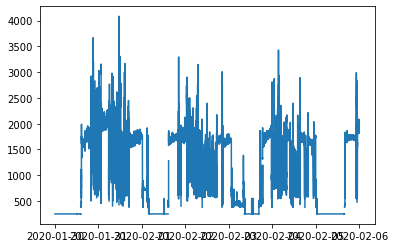

In [6]:
x = df1['datetime']
y = df1['Load']

plt.plot(x,y)

In [7]:
#Create dataset with only relevant columns
df2 = df1[['datetime', 'Load', 'engMdoPower_0_','engMdoPower_1_','engMdoPower_2_', 'engMdoPower_3_', 'operationId', 'BaseLoad']]

#Set engine powers to zero
num = df2['engMdoPower_0_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_1_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_2_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_3_']._get_numeric_data()
num[num != 0] = 0


In [9]:
display(df2)

,datetime,Load,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_,operationId,BaseLoad
0,2020-01-30 00:00:00,300.0,0.0,0.0,0,0.0,6.0,300
1,2020-01-30 00:00:05,300.0,0.0,0.0,0,0.0,6.0,300
2,2020-01-30 00:00:10,300.0,0.0,0.0,0,0.0,6.0,300
3,2020-01-30 00:00:15,300.0,0.0,0.0,0,0.0,6.0,300
4,2020-01-30 00:00:20,300.0,0.0,0.0,0,0.0,6.0,300
...,...,...,...,...,...,...,...,...
120955,2020-02-05 23:59:35,1796.0,0.0,0.0,0,0.0,3.0,300
120956,2020-02-05 23:59:40,1743.2,0.0,0.0,0,0.0,3.0,300
120957,2020-02-05 23:59:45,1725.6,0.0,0.0,0,0.0,3.0,300
120958,2020-02-05 23:59:50,1760.8,0.0,0.0,0,0.0,3.0,300


In [10]:
df3 = df2.copy()

load = df3['Load'].values
dg0 = df3['engMdoPower_0_'].values
dg1 = df3['engMdoPower_1_'].values
dg2 = df3['engMdoPower_2_'].values
dg3 = df3['engMdoPower_3_'].values
opid = df3['operationId'].values

for i in range(len(load)):
    if load[i] <= 2100:
        if opid[i] == 100: # or opid[i] == 3 #DP mode or transit mode
            dg0[i] = dg1[i] = load[i]/2
        elif opid[i] == 6:
            dg0[i] = 0
            dg1[i] = 0
        else:    
            dg0[i] = load[i]
    elif load[i] > 2100 and load[i] <= 3000:
        if opid[i] == 100: #or opid[i] == 3 #DP mode or transit mode
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
        elif opid[i] == 6:
            dg0[i] = 0
            dg1[i] = 0
        else:
            dg0[i] = dg1[i] = load[i]/2
    elif load[i] > 3000 and load[i] <= 4200:
        if opid[i] == 100: #or opid[i] == 3 #DP mode or transit mode
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
        elif opid[i] == 6:
            dg0[i] = 0
            dg1[i] = 0
        else:
            dg0[i] = dg1[i] = load[i]/2
    

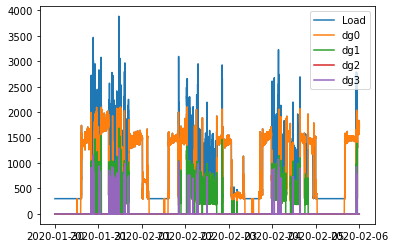

In [11]:
x = df3['datetime']

plt.plot(x, load, label = 'Load')
plt.plot(x, dg0, label = 'dg0')
plt.plot(x, dg1, label = 'dg1')
plt.plot(x, dg2, label = 'dg2')
plt.plot(x, dg3, label = 'dg3')
plt.legend()

In [12]:
# 0.238 is stigningsgraden for fuel consumption
fc = (0.238/720)*dg0 + (0.238*dg1)/720 + (0.238*dg2)/720 + (0.238*dg3)/720
sum_fc = sum(fc)
sum_fc

32448.351452598657

In [87]:
df4 = df2.copy()

load = df4['Load'].values
dg0 = df4['engMdoPower_0_'].values
dg1 = df4['engMdoPower_1_'].values
dg2 = df4['engMdoPower_2_'].values
dg3 = df4['engMdoPower_3_'].values
opid = df4['operationId'].values

for i in range(len(load)):
    if opid[i] == 100:
        if load[i] <= 2100:
            dg0[i] = dg1[i] = load[i]/2
        elif load[i] > 2100 and load[i] <= 4200:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
    elif opid[i] != 100:
        if load[i] <= 2100:
            dg0[i] = load[i]
        elif load[i] > 2100 and load[i] <= 4200:
            dg0[i] = dg1[i] = load[i]/2
    

In [88]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

len(dg0)
type(dg0)

numpy.ndarray

In [89]:
fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720

In [92]:
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of BASECASE uten batteri er: ', fc, 'liter')

Total fuel consumption of BASECASE uten batteri er:  46377.4682647363 liter
